In [44]:
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re
import sys
from tqdm.notebook import tqdm
from selenium.webdriver.common.keys import Keys
from IPython.display import Image
keys =Keys()
import requests

#### selenium 사용 , bs4 사용

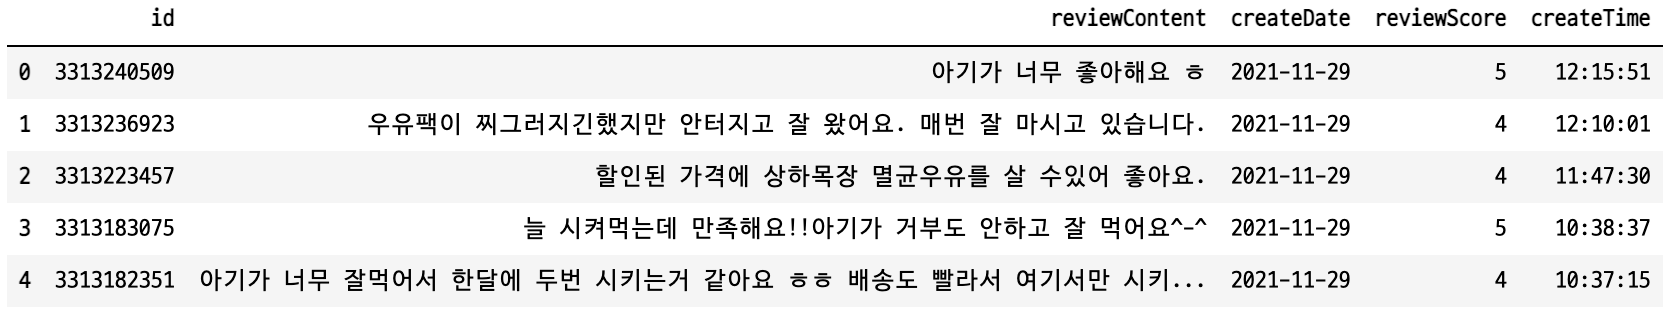

In [5]:
Image('imgs/wc_1.png')

In [94]:
url = 'https://brand.naver.com/koreaeundan/products/5199405834'

In [95]:
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

In [96]:
count = 0
stop = 3
next_btn = ['a:nth-child(2)','a:nth-child(3)','a:nth-child(4)','a:nth-child(5)','a:nth-child(6)',
            'a:nth-child(7)','a:nth-child(8)','a:nth-child(9)','a:nth-child(10)','a:nth-child(11)','a.fAUKm1ewwo._2Ar8-aEUTq']


In [97]:
review_list=[]
while count < stop:
    for pagenum in next_btn:
        driver.find_element_by_css_selector('#REVIEW > div > div._2y6yIawL6t > div > div.cv6id6JEkg > div > div > '+str(pagenum)+'').send_keys(Keys.ENTER)
        time.sleep(2)
        for i in range(0,20):
            html = driver.page_source
            soup = BeautifulSoup(html, 'html.parser')
            review = soup.find_all('div',class_='_1-CNpGwOcC')
            review = review[i].text
            review = re.sub('[^#0-9a-zA-Zㄱ-ㅣ가-힣 ]',' ',review)
            review_list.append(review)
    count = count + 1

C:\Users\User\AppData\Local\Temp\ipykernel_9444\605801818.py:4: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_css_selector('#REVIEW > div > div._2y6yIawL6t > div > div.cv6id6JEkg > div > div > '+str(pagenum)+'').send_keys(Keys.ENTER)


In [268]:
len(review_list)

660

In [269]:
review_list[:10]

['리뷰 더보기 접기평점5hyoj    22 02 18 신고현재 고려은단 멀티비타민을 함께 먹고있어요  저는 뭐니뭐니해도 고려은단 비타민C가 몸에 잘받는것같아서 두개 같이먹어요ㅎㅎ 특히 목넘김 쉽게 새로나와서 진짜 너무 편하게삼켜요ㅠㅠ 맨날 목에걸리고 한번에 안넘어갔거든요 크기비교하시라고 멀티비타민이랑 같이 속내용물 찍어봅니다  멀티비타민이 기존꺼랑 비슷한거같아요 아마 같거나요  사진 비디오 수2이미지 펼쳐보기1리뷰가 도움이 되었나요 ',
 '리뷰 더보기 접기평점57777    22 02 21 신고재구매멀티비타민 비타민C 같이먹으면좋다고해서 구입해서 먹어보고  괜찮아서 재구매했어요 합리적인가격에 효과도있는듯  저하고는 잘맞네요  멀티비타민은 비타민C보다 약크기가 크긴하지만 목넘김좋구요  꾸준히 복용해보니 먹지않은날과는 차이가있는것같아요  타사비타민중 저랑안맞는경우에는 위장장애가 생기기도하는데 전혀없고 좋아요  추천합니다  이미지 펼쳐보기0리뷰가 도움이 되었나요 ',
 '리뷰 더보기 접기평점5amas    22 02 05 신고배송도 빨리왓구 삼키기 편한 크기라 좋아요  멀티비타민은 아침에 먹구 비타민C D는 점심 식후에  저녁에 자기전에 칼슘  마그네슘 먹으려구 합니다  잘챙겨먹겠습니다 사진 비디오 수3이미지 펼쳐보기0리뷰가 도움이 되었나요 ',
 '리뷰 더보기 접기평점4kker    22 02 22 신고택배 생각보다 일찍왔네요 비타민d 알약이 따로 있는줄알았는데 한알에 성분이 두가지인가봐요 잘 먹을게요사진 비디오 수3이미지 펼쳐보기0리뷰가 도움이 되었나요 ',
 '리뷰 더보기 접기평점5iiam    22 02 15 신고고려은단 유명해서 시켜보고 싶었는데  이번에 비타민C 영양제 찾으면서 구매하게 되었어요  저는 좀만 함량이 강하면 미식거리는데  이 제품은 섭취 후에 속도 편하고  목 넘김이 좋게 나와서 섭취할 때에도 부담이 적습니다    만족스러워요 사진 비디오 수2이미지 펼쳐보기0리뷰가 도움이 되었나요 ',
 '리뷰 더보기 접기평점5lsoe    22 02 

In [270]:
test_list = review_list[:2]
test_list[0]

'리뷰 더보기 접기평점5hyoj    22 02 18 신고현재 고려은단 멀티비타민을 함께 먹고있어요  저는 뭐니뭐니해도 고려은단 비타민C가 몸에 잘받는것같아서 두개 같이먹어요ㅎㅎ 특히 목넘김 쉽게 새로나와서 진짜 너무 편하게삼켜요ㅠㅠ 맨날 목에걸리고 한번에 안넘어갔거든요 크기비교하시라고 멀티비타민이랑 같이 속내용물 찍어봅니다  멀티비타민이 기존꺼랑 비슷한거같아요 아마 같거나요  사진 비디오 수2이미지 펼쳐보기1리뷰가 도움이 되었나요 '

In [271]:
test_list[0].replace('  사진 비디오 수2이미지 펼쳐보기1리뷰가 도움이 되었나요 ','')

'리뷰 더보기 접기평점5hyoj    22 02 18 신고현재 고려은단 멀티비타민을 함께 먹고있어요  저는 뭐니뭐니해도 고려은단 비타민C가 몸에 잘받는것같아서 두개 같이먹어요ㅎㅎ 특히 목넘김 쉽게 새로나와서 진짜 너무 편하게삼켜요ㅠㅠ 맨날 목에걸리고 한번에 안넘어갔거든요 크기비교하시라고 멀티비타민이랑 같이 속내용물 찍어봅니다  멀티비타민이 기존꺼랑 비슷한거같아요 아마 같거나요'

In [283]:
id_list = []
coment_list = []
date_list = []
star_list = []

In [284]:
for review in review_list:
        review_clean = review.replace('리뷰', '')
        review_clean = review_clean.replace('더보기 접기평점', '')
        review_clean = review_clean.replace('신고', '')
        review_clean = review_clean.replace('사진', '')
        review_clean = review_clean.replace('비디오', '')
        review_clean = review_clean.replace('비디오', '')
        review_clean = review_clean.replace('이미지', '')
        review_clean = review_clean.replace('펼쳐보기', '')
        review_clean = review_clean.replace('수2', '')
        review_clean = review_clean.replace('수0', '')
        review_clean = review_clean.replace('수3', '')
        review_clean = review_clean.replace('수4', '')
        review_clean = review_clean.replace('수5', '')
        review_clean = review_clean.replace('수6', '')
        review_clean = review_clean.replace('도움이 되었나요', '')
        review_clean = review_clean.replace('0가', '')
        review_clean = review_clean.replace('1가', '')
        review_clean = review_clean.replace('2가', '')
        review_clean = review_clean.replace('3가', '')
        review_clean = review_clean.replace('4가', '')
        review_clean = review_clean.replace('5가', '')
        review_clean = review_clean.replace('   ', '')
        # df_review.append(review_clean)
        star_list.append(review_clean[1])
        id_list.append(review_clean[2:6])
        date_list.append(review_clean[7:15])
        coment_list.append(review_clean[16:])
        # print(review_clean)

In [285]:
print(star_list[:3])
print(id_list[:3])
print(date_list[:3])
print(coment_list[:3])

['5', '5', '5']
['hyoj', '7777', 'amas']
['22 02 18', '22 02 21', '22 02 05']
['현재 고려은단 멀티비타민을 함께 먹고있어요  저는 뭐니뭐니해도 고려은단 비타민C가 몸에 잘받는것같아서 두개 같이먹어요ㅎㅎ 특히 목넘김 쉽게 새로나와서 진짜 너무 편하게삼켜요ㅠㅠ 맨날 목에걸리고 한번에 안넘어갔거든요 크기비교하시라고 멀티비타민이랑 같이 속내용물 찍어봅니다  멀티비타민이 기존꺼랑 비슷한거같아요 아마 같거나요 ', '재구매멀티비타민 비타민C 같이먹으면좋다고해서 구입해서 먹어보고  괜찮아서 재구매했어요 합리적인가격에 효과도있는듯  저하고는 잘맞네요  멀티비타민은 비타민C보다 약크기가 크긴하지만 목넘김좋구요  꾸준히 복용해보니 먹지않은날과는 차이가있는것같아요  타사비타민중 저랑안맞는경우에는 위장장애가 생기기도하는데 전혀없고 좋아요  추천합니다  ', '배송도 빨리왓구 삼키기 편한 크기라 좋아요  멀티비타민은 아침에 먹구 비타민C D는 점심 식후에  저녁에 자기전에 칼슘  마그네슘 먹으려구 합니다  잘챙겨먹겠습니다']


In [286]:
date_list1 = []
for date in date_list:
    temp = date.replace(' ','')
    date_list1.append(temp)


In [287]:
eundan_df = pd.DataFrame({'id':id_list,'reviewContent' :coment_list,'createDate':date_list1,'reviewScore':star_list})

In [288]:
eundan_df.loc[eundan_df.reviewScore == '점','reviewScore'] = str(4)
eundan_df['reviewScore'].value_counts()

5    544
4    105
3     10
2      1
Name: reviewScore, dtype: int64

In [292]:
# eundan_df = eundan_df[['id','reviewContent', 'createDate', 'reviewScore']]
# eundan_df = eundan_df[0:-1]
eundan_df.tail(10)

,id,reviewContent,createDate,reviewScore
650,noba,아직 효과는 모르겠지만 열심히 먹어볼려구요,220205,5
651,lady,유통기한 넉넉하고 먹기 쉬워서 좋아요,220207,5
652,summ,비타민 좋아서 구매해요,220209,4
653,jmh3,계속 먹던거에요 배송도 빨라요,220204,5
654,wltj,재구매예요 우선알약크기가작은것때문에 구매해요 꾸준히복용하면피로회복에좋을것같아요,220126,4
655,5cho,오미크론걸린 친구한테 선물했어요 비타민c가 코로나에 좋데요 많이들 드세요,22021,4
656,1224,유통기한도 좋고 배송빠르네여 다음에또주문할께여 ㅎ,220205,5
657,5sor,비타민제를 고르다가 고려은단이 유명해서 고르게 되었는데 괜찮은 거 같아요,22022,4
658,5kyu,빠른 배송 감사합니다 싸게 잘 샀어요감사합니다 잘먹을께요,22022,4
659,coor,한달사용기배송이 빨라서 좋아요,220210,5


#### bs4 사용

In [ ]:
# 1. 웹서비스 분석 : URL
page_size, page = 20, 1
url = f"https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize={page_size}&merchantNo=500009386&originProductNo=5144675441&sortType=REVIEW_RANKING"

In [300]:
def product_review(page):
    # 1. 웹서비스 분석 : URL
    page_size, page = 20, 1
    url = f"https://brand.naver.com/n/v1/reviews/paged-reviews?page={page}&pageSize={page_size}&merchantNo=510733880&originProductNo=5267626204&sortType=REVIEW_RANKING"
    
    response = requests.get(url)
    # 3.
    data = response.json()["contents"]
    columns = ["id", "reviewContent", "createDate", "reviewScore"]
    product_df = pd.DataFrame(data)[columns]
    #4.
    product_df["createDate"] = product_df["createDate"].astype('str')
    date_list = product_df["createDate"].str.split("T")
    product_df["createDate"] = date_list.str.get(0)
    product_df["createTime"] = date_list.str.get(1)
    product_df["createTime"] = product_df["createTime"].apply(lambda data : data[:-9])
    
    return product_df

In [301]:
product_review(1)

,id,reviewContent,createDate,reviewScore,createTime
0,3366570463,33년만에 처음으로 영양제 입문했는데요~\n유산균. 오메가3. 루테인. 밀크씨슬. ...,2022-02-13,5,06:57:17
1,3364472467,저번에 아버지 생신 선물로 샀는데 요즘따라 제가 기운도 없고 음식도 안먹을때가 많아...,2022-02-10,5,11:56:01
2,3368089131,효과적으로는 솔직히 잘 모르겠어요(이제 한달 정도 먹고 있는 상태라~~) 사이즈는 ...,2022-02-15,5,09:54:04
3,3370513649,두말 할 필요가 없어요. 현대인에게는 영양제 하나 쯤은 꼭 먹어야 한다고 봅니다. ...,2022-02-18,5,08:08:45
4,3364056600,금욜 늦은밤 주문 주말이 껴서\n 월욜날 받았습니다. 안전포장 배송되었구 알약 크...,2022-02-10,5,03:34:10
5,3370720359,잘 챙겨먹는 영양제입니다.. 배송 빠르고 좋은데.. 매번 필요없는 쇼핑백이 와서 아...,2022-02-18,5,13:08:38
6,3348180767,"상세한 리뷰는 사진마다 작성했어요. 딱히 빠지는 것도 없고, 제조사와 판매사가 같은...",2022-01-16,5,15:18:00
7,3362647295,고려은단은 워낙 유명한 회사라 믿고 구매했어요! 예전에는 비타민C를 먹었거든요. 목...,2022-02-08,5,11:08:33
8,3371430414,몸에 좋다는 거라지만 다 챙겨먹는 것도 어렵더라구요~간편하게 하루 한알만 먹는것 찾...,2022-02-19,5,13:26:51
9,3369856792,어제 밤 늦게 주문했는데 오늘 오전에 받았어요\n쿠* 보다 빠르네요ㅋ\n비타민C를 ...,2022-02-17,5,11:49:26


In [302]:
# pandas.concat()사용
product_dfs = []
for page in range(1,150):
    print(page, end=" ")
    product_dfs.append(product_review(page)) 

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 

In [303]:
result_df = pd.concat(product_dfs, ignore_index=True)

In [304]:
result_df['reviewContent'] = result_df['reviewContent'].apply(lambda data : data.replace('\n', ' '))

In [305]:
result_df.tail(12)

,id,reviewContent,createDate,reviewScore,createTime
2968,3371430414,몸에 좋다는 거라지만 다 챙겨먹는 것도 어렵더라구요~간편하게 하루 한알만 먹는것 찾...,2022-02-19,5,13:26:51
2969,3369856792,어제 밤 늦게 주문했는데 오늘 오전에 받았어요 쿠* 보다 빠르네요ㅋ 비타민C를 고려...,2022-02-17,5,11:49:26
2970,3358314927,입안이 자주 헐고 피로감이 심해 주변에서 멀티비타민 추천 해줬어요. 40대중반인데 ...,2022-02-02,5,06:06:44
2971,3369525293,잘먹고 있어요 유재석씨가 광고하는 것 보고 샀네요ㅎ 코시국이라 건강을 더 챙겨야할 ...,2022-02-17,5,04:58:51
2972,3363340751,챙겨야할 양을 모자르게 주문해 추가주문했네요 종합비타민은 복용한지 얼마 안돼 믿고 ...,2022-02-09,5,07:07:28
2973,3372514425,"홀인원멀티비타민&amp;비타민C1000 같이 구매해서 먹어보고,만족해서 재구매했어요...",2022-02-21,5,08:23:01
2974,3368802405,"가족들 다 이거 먹어요. 센*룸,얼라*브, 올*, 오쏘* 이것저것 먹어봤는데 전 이...",2022-02-16,5,07:10:40
2975,3368801790,"가족들 다 이거 먹어요. 센*룸,얼라*브, 올*, 오쏘* 이것저것 먹어봤는데 전 이...",2022-02-16,5,07:09:56
2976,3368801202,"가족들 다 이거 먹어요. 센*룸,얼라*브, 올*, 오쏘* 이것저것 먹어봤는데 전 이...",2022-02-16,5,07:09:14
2977,3373184690,포장부터 환경을 생각하는 것이 보이네요. 잘 도착했습니다. 종이백은 안 주셔도 됐는...,2022-02-22,5,08:23:23


In [ ]:
# 조별 과제 : 워드 클라우드 만들기 & EDA + 추가적인 텍스트 수집

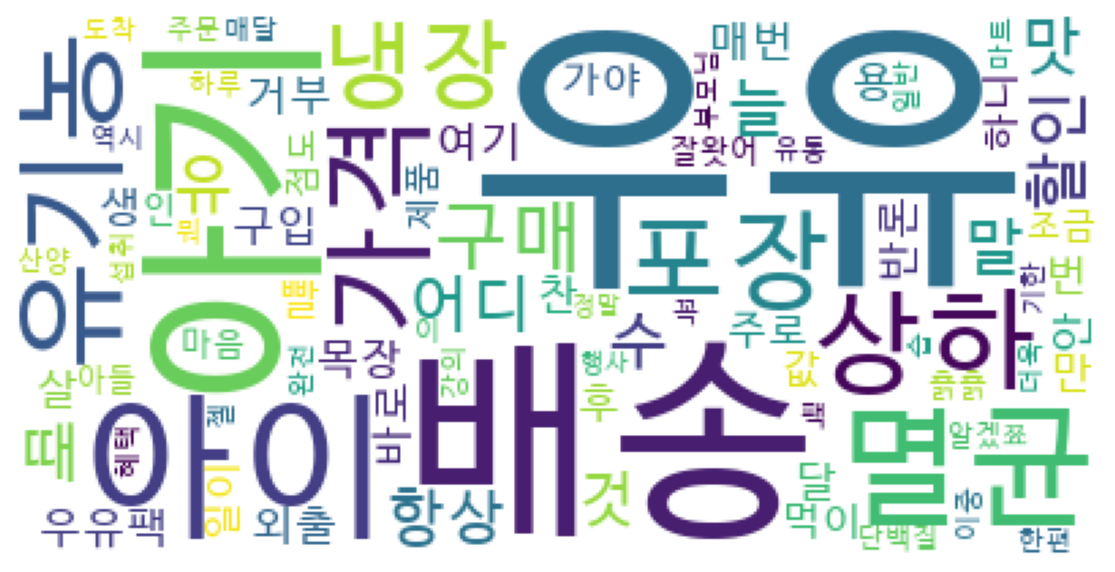

In [9]:
Image('imgs/wc_2.png')

In [ ]:
# 상하목장 우유는 아이가 주로 소비하고 유기농 멸균 우유라는것이 이유
# 주로 네이버 스마트 스토어는 배송으로 주문하기 위해 주문한다.